In [5]:
pip install dmba

In [6]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

## 5.1

In [10]:
df = pd.DataFrame(
    {"사기" : [30, 58],
    "비사기" : [32, 920]},
    index = pd.MultiIndex.from_tuples(
    [('예측','사기'),('예측','비사기')]))

df

사기  비사기
예측 사기   30   32
   비사기  58  920

In [25]:
n12_n21 = df.loc[('예측', '사기'), '비사기'] + df.loc[('예측', '비사기'), '사기']
total = df['사기'].sum() + df['비사기'].sum()
err = n12_n21/total
err

0.08653846153846154

## 5.2

a. 컷오프 값을 올리면 정말 사기인 레코드에 대한 분류 오차율이 증가한다. 기존에 비해 정말 사기이지만 비사기로 분류되는 레코드의 수가 증가할 것이기 때문이다. 컷오프 값을 내려도 분류 오차율이 증가한다. 비사기이지만 사기로 분류되는 레코드의 수가 증가되기 때문이다.

b. 위와 동일

## 5.4

a. 첫번째 막대는 상위 10%를 선택했을 경우 임의의 10%를 선택했을 때에 비해 6.5배의 응답을 얻을 수 있음을 의미하고 두번째 막대는 상위 10-20%를 선택했을 경우 임의로 선택했을 때와 비교하여 약 2.8배의 응답을 얻을 수 있음을 의미한다.

c.

In [31]:
df = pd.DataFrame(
    {"사기" : [0, 88],
    "비사기" : [0, 952]},
    index = pd.MultiIndex.from_tuples(
    [('예측','사기'),('예측','비사기')]))

df

사기  비사기
예측 사기    0    0
   비사기  88  952

In [39]:
n12_n21 = df.loc[('예측', '사기'), '비사기'] + df.loc[('예측', '비사기'), '사기']
total = df['사기'].sum() + df['비사기'].sum()
err = n12_n21/total
err

0.08461538461538462

## 5.5

a.

In [40]:
df = pd.DataFrame(
    {"사기" : [310, 90],
    "비사기" : [130, 270]},
    index = pd.MultiIndex.from_tuples(
    [('예측','사기'),('예측','비사기')]))

df

사기  비사기
예측 사기   310  130
   비사기   90  270

b.

** 수정된 정오행렬

In [44]:
df = pd.DataFrame(
    {"실제 사기" : [310/50, 90/50, 310/50 + 90/50],
    "실제 비사기" : [130/(50/99), 270/(50/99), 130/(50/99) + 270/(50/99)],
    "합계" : [310/50 + 130/(50/99), 90/50 + 270/(50/99), 310/50 + 90/50 + 130/(50/99) + 270/(50/99)]},
    index = ['예측 사기', '예측 비사기', '합계'])

df

,실제 사기,실제 비사기,합계
예측 사기,6.2,257.4,263.6
예측 비사기,1.8,534.6,536.4
합계,8.0,792.0,800.0


** 수정된 오분류율

In [46]:
n12_n21 = df.loc['예측 비사기', '실제 사기'] + df.loc['예측 사기', '실제 비사기']
total = df.loc['합계','합계']
err = n12_n21/total
err

0.324

c.

In [49]:
prob = df.loc['예측 사기', '합계']/total
prob

0.3295

## 5.6

b. 십분위 향상차트로 보아 상위 10%를 선택하면 두배의 평균 수익을 얻을 수 있다.

## 5.7

a.

In [72]:
df = pd.DataFrame(
    {"1의 경향" : [0.03, 0.52, 0.38, 0.85, 0.33, 0.42, 0.55, 0.29, 0.09, 0.21, 0.43, 0.04, 0.08, 0.13, 0.01, 0.79, 0.42, 0.29, 0.08, 0.02],
    "실제" : [0, 0, 0, 1, 0, 0, 1, 0,0,0, 0,0,0,0,0, 1, 0,0,0,0]})

df

,1의 경향,실제
0,0.03,0
1,0.52,0
2,0.38,0
3,0.85,1
4,0.33,0
5,0.42,0
6,0.55,1
7,0.29,0
8,0.09,0
9,0.21,0


1) 0.25 컷오프 값

In [71]:
class_names = [0, 1]
predicted = [1 if p > 0.25 else 0 for p in df['1의 경향']]
classificationSummary(df['실제'], predicted, class_names=class_names)

KeyError: '1의 경향'

In [56]:
민감도 = 9 / (9+8)
민감도

0.5294117647058824

In [57]:
특이도 = 0
특이도

0

2) 0.5 컷오프 값

In [58]:
class_names = [0, 1]
predicted = [1 if p > 0.5 else 0 for p in df['1의 경향']]
classificationSummary(df['실제'], predicted, class_names=class_names)

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual  0  1
     0 16  1
     1  0  3


In [59]:
민감도 = 16 / (16+1)
민감도

0.9411764705882353

In [60]:
특이도 = 0
특이도

0

3) 0.75 컷오프 값

In [61]:
class_names = [0, 1]
predicted = [1 if p > 0.75 else 0 for p in df['1의 경향']]
classificationSummary(df['실제'], predicted, class_names=class_names)

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual  0  1
     0 17  0
     1  1  2


In [62]:
민감도 = 17 / (17+0)
민감도

1.0

In [63]:
특이도 = 1/(1+2)
특이도

0.3333333333333333

b.

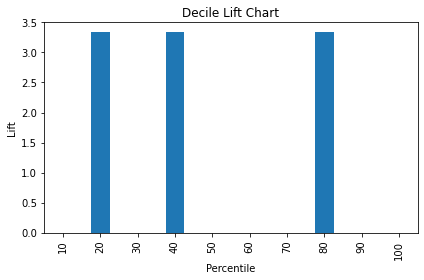

In [73]:
liftChart(df['실제'], labelBars=False)
plt.tight_layout()
plt.show()